<a href="https://colab.research.google.com/github/shufan1/Hemingway/blob/main/HelloDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ingestion of data



download the book

In [3]:
!wget https://raw.githubusercontent.com/shufan1/Hemingway/main/OldManSeaBook.txt

--2021-09-16 12:58:33--  https://raw.githubusercontent.com/shufan1/Hemingway/main/OldManSeaBook.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135337 (132K) [text/plain]
Saving to: ‘OldManSeaBook.txt’

OldManSeaBook.txt   100%[===================>] 132.17K  --.-KB/s    in 0.02s   

2021-09-16 12:58:33 (6.11 MB/s) - ‘OldManSeaBook.txt’ saved [135337/135337]



In [4]:
!head OldManSeaBook.txt

THE OLD MAN

AND

THE SEA




ERNEST HEMINGWAY


In [5]:
!tail OldManSeaBook.txt

  THE TORRENTS OF SPRING
  IN OUR TIME


_CHARLES SCRIBNER'S SONS_




[End of The Old Man and the Sea, by Ernest Hemingway]


In [6]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [7]:
from pathlib import Path
import spacy

In [8]:
# grab text
!rm *.txt #remove before grabbing
!wget https://raw.githubusercontent.com/shufan1/Hemingway/main/OldManSeaBook.txt
!wget https://raw.githubusercontent.com/shufan1/Hemingway/main/AnsaelAdamsWikipedia.txt
!wget https://raw.githubusercontent.com/shufan1/Hemingway/main/SunAlsoRises.txt

--2021-09-16 13:01:11--  https://raw.githubusercontent.com/shufan1/Hemingway/main/OldManSeaBook.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135337 (132K) [text/plain]
Saving to: ‘OldManSeaBook.txt’

OldManSeaBook.txt   100%[===================>] 132.17K  --.-KB/s    in 0.02s   

2021-09-16 13:01:12 (5.86 MB/s) - ‘OldManSeaBook.txt’ saved [135337/135337]

--2021-09-16 13:01:12--  https://raw.githubusercontent.com/shufan1/Hemingway/main/AnsaelAdamsWikipedia.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71588 (70K) [tex

In [9]:
nlp = spacy.load("en_core_web_lg")

In [10]:
oms_text = nlp(Path('OldManSeaBook.txt').read_text())
sar_text = nlp(Path('SunAlsoRises.txt').read_text())
aa_text = nlp(Path('AnsaelAdamsWikipedia.txt').read_text())

In [11]:
oms_text.similarity(sar_text)

0.9886717432792989

# Word Visualizations

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

!python -m textblob.download_corpora


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [13]:
from textblob import TextBlob
from nltk.corpus import stopwords

In [15]:
stop_words = stopwords.words('english')
oms_blob = TextBlob(Path('OldManSeaBook.txt').read_text())


#without stop word removal
oms_count = oms_blob.word_counts.items()
print("before removing:",len(oms_count))


def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word[0])
    return no_stop

  
no_stop_words = remove_stop(oms_count)
#the stop words are removed
print("after:", len(no_stop_words))

before removing: 2532
after: 2406


Word Cloud

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

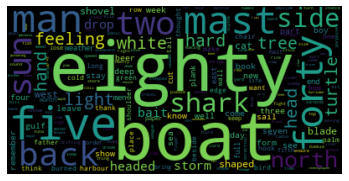

In [17]:

word_cloud_text = str1 = ' '.join(no_stop_words)
wordcloud = WordCloud().generate(word_cloud_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Get individual word

In [18]:

from pandas import DataFrame
df = DataFrame(no_stop_words, columns=["old-man-sea-words"])
df.head()
df.to_csv("old-man-sea-words.txt",index=False)